In [1]:
import pandas as pd

df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()

177

In [3]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

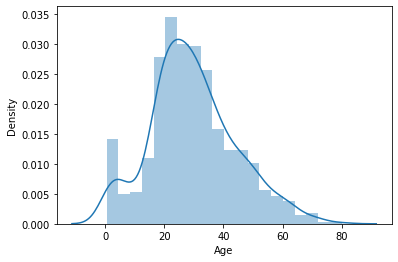

In [4]:
sns.distplot(df['Age'].dropna())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

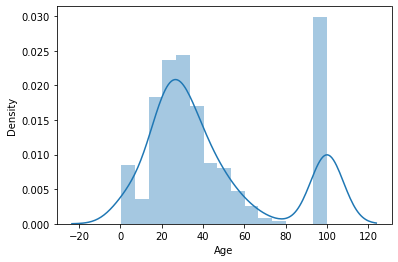

In [5]:
sns.distplot(df['Age'].fillna(100))

Text(0.5, 1.0, 'Age with outliers')

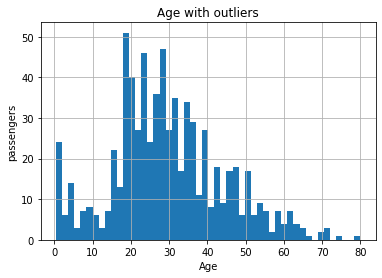

In [6]:
fig=df['Age'].hist(bins=50)
fig.set_xlabel('Age')
fig.set_ylabel('passengers')
fig.set_title('Age with outliers')


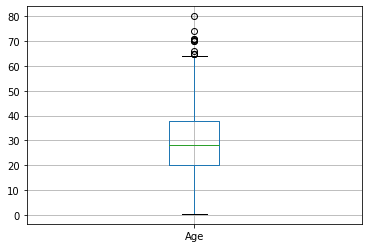

In [7]:
fig=df.boxplot(column='Age')

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
#Assuming the datsetof age is normally distributed
up_bound=df['Age'].mean() + 3 * df['Age'].std()

low_bound=df['Age'].mean() - 3 * df['Age'].std()

print('Upper Bound :',up_bound)
print('Lower Bound :',low_bound)
print('Mean :',df.Age.mean())

Upper Bound : 73.27860964406094
Lower Bound : -13.880374349943303
Mean : 29.69911764705882


# When the data is skewed

Text(0, 0.5, 'Passengers')

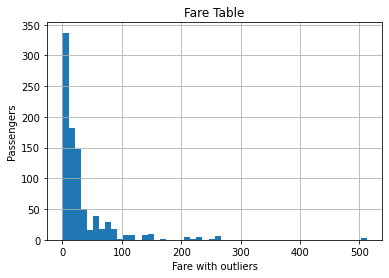

In [10]:
fig=df.Fare.hist(bins=50)
fig.set_xlabel('Fare with outliers')
fig.set_title('Fare Table')
fig.set_ylabel('Passengers')


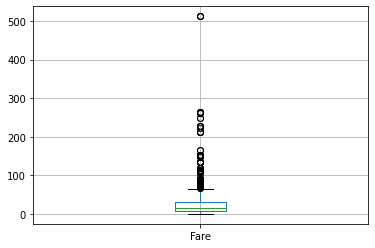

In [11]:
fig=df.boxplot(column='Fare')

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [14]:
#Assuming the datsetof Fare is normally distributed and here 3 means 3 standard deviation
up_bound=df['Fare'].mean() + 3 * df['Fare'].std()

low_bound=df['Fare'].mean() - 3 * df['Fare'].std()

print('Upper Bound :',up_bound)
print('Lower Bound :',low_bound)
print('Mean : ',df.Fare.mean())

Upper Bound : 181.2844937601173
Lower Bound : -116.87607782296804
Mean :  32.204207968574636


In [15]:
#For highly unbalanced dataset we need to use this method
low_bridge=df['Fare'].quantile(0.25)-(IQR*3)
up_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(low_bridge)
print(up_bridge)

-61.358399999999996
100.2688


# Data after outlier detections

In [16]:
datac=df.copy()

In [17]:
#Replacing the any value(outlier)is greater than upper bound for simple normal distributed
datac.loc[datac.Age>=73,'Age']=73

In [18]:
#Replacing the any value(outlier)is greater than upper bound for highly unbalanced data

datac.loc[datac.Fare>=100,'Fare']=100

Text(0, 0.5, 'passengers')

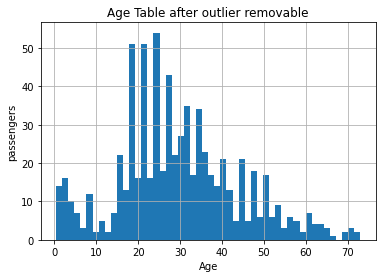

In [19]:
fig=datac['Age'].hist(bins=50)
fig.set_xlabel('Age')
fig.set_title('Age Table after outlier removable')
fig.set_ylabel('passengers')


Text(0, 0.5, 'passengers')

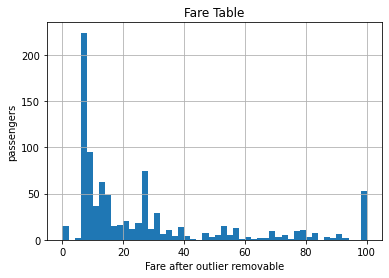

In [20]:
fig=datac.Fare.hist(bins=50)
fig.set_xlabel('Fare after outlier removable')
fig.set_title('Fare Table')
fig.set_ylabel('passengers')


In [21]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(datac[['Age','Fare']].fillna(0),datac['Survived'],test_size=0.25)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
y_predict=model.predict(x_test)
y_predict_1=model.predict_proba(x_test)

In [23]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
true_r,false_r,_=roc_curve(y_test,y_predict)
print(f'Accuracy score: {accuracy_score(y_test,y_predict)}')
print(f'Roc_auc_score :{roc_auc_score(y_test,y_predict_1[:,1])}')

Accuracy score: 0.6771300448430493
Roc_auc_score :0.7155768898114513


In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(x_test)
y_pred_1=model.predict_proba(x_test)

In [25]:
tpr,pfr,_=roc_curve(y_test,y_pred)
print(f'Accuracy score: {accuracy_score(y_test,y_pred)}')
print(f'Roc_auc_score :{roc_auc_score(y_test,y_pred_1[:,1])}')

Accuracy score: 0.6816143497757847
Roc_auc_score :0.7608112783255493


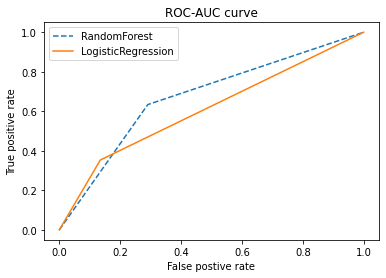

In [26]:
import matplotlib.pyplot as plt
plt.plot(tpr,pfr,linestyle='--',label='RandomForest')
plt.plot(true_r,false_r,linestyle='-',label='LogisticRegression')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC curve')
plt.legend()